In [51]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Lab 5 – Advanced Table Methods

## Data 6, Summer 2024

Today we will be exploring some more complex table methods we can use! The `apply`, `group`, `pivot`, and `join` methods all allow us to perform different queries on our familiar tables. Understanding not only *how* each method works, but also *why* and *when* to use them are the key takeaways from this lab; by the end of it, we will be able to query tables in some pretty cool ways!

These new methods allow us to do different operations than before. As such, it is becoming more and more important to remember how each method sits on our Data Science toolbelt. We should think of each new method as a **tool that serves a specific purpose**. Your job as a data scientist is not only to understand what each tool does, but when each tool is applicable in new situations!

In this lab, we'll be working with a `movies` data set that contains information about various American films over time. It contains the following columns:
1. `"Film"`: The name of the movie
2. `"Genre"`: The genre of the movie
3. `"Year"`: The year the movie was released
4. `"Lead Studio"`: The primary movie studio responsible for producing the movie
5. `"Audience score %"`: The score, out of 100%, given to the movie by viewers
6. `"Rotten Tomatoes %"`: The score, out of 100%, given to the movies by the website [Rotten Tomatoes](https://www.rottentomatoes.com/)
7. `"Worldwide Gross (Millions)"`: The total gross revenue, in millions of dollars, that the movie made
8. `"Quality"`: Descriptive ranking of the movie based on audience score

Let's load the dataset into a new table, `movies`, to get practice with the more advanced table methods.

In [ ]:
movies = Table.read_table("data/movies.csv")
movies.show(5)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 1: Advanced Table Methods

### The [apply](http://data8.org/datascience/_autosummary/datascience.tables.Table.apply.html#datascience.tables.Table.apply) method

The `apply` method allows us to map a function's behavior onto an entire column of a table. We can use built-in Python functions (like `max`) or we can define our own functions and then *apply* those functions to the columns of a table.

The `apply` method takes at least 2 arguments. The first is a function, and the rest are as many column labels you need to run that function. The number of columns you need to specify is dependent on the number of arguments the function has. For example, if the function you provide needs two inputs, you need to list two columns for it to work on.

`apply` returns a NumPy array of the transformed values. We can ask questions like "How can I categorize the items in this column?" (like converting grade percentages into letter grades from lecture). We can also make modifications to a table, like rounding all the values in a column to a certain accuracy.

### Example Use
We can see some examples of `apply` at work. Let's use `apply` to take the average of the two score percentages, `"Audience score %"` and `"Rotten Tomatoes %"`.

In [ ]:
def average_score(audience_score, rt_score):
    "Computes the average score between the audience score and Rotten Tomatoes score"
    return (audience_score + rt_score) / 2

In [ ]:
average_scores = movies.apply(average_score, "Audience score %", "Rotten Tomatoes %")
average_scores

Now, let's add a new column called `"Average score %"` and populate it with the information we just assigned to `average_scores`. We'll re-assign this new table to `movies`.

In [ ]:
movies = movies.with_column("Average score %", average_scores)
movies.show(5)

We can use `apply` in this way to add columns to a table that transforms something in the table to something that more people can understand more easily!

### Input Type and Output Type

Very quickly, we should talk about **input type** and **output type**. **Input type** is the *type* of the arguments in a function. A function can take in as input any of the types we have talked about so far in this class (int, str, boolean, etc.). The input type is very important when using the table methods we talk about today, because there can be behavior we do not expect if we give a function the wrong input type. Let's see an example of this behavior when we try to use our `average_score` function on a row that has an **input type** of `str` instead of `int`:

In [ ]:
movies.apply(average_score, "Genre", "Lead Studio")

The error message does not make it *explicitly* clear that the function you provided got an incorrect input type, but if you are using a table method and the error message seems to indicate incompatible types interacting with each other, that may be the issue. You can see this on the **last line of the error message**:

```python
TypeError: unsupported operand type(s) for /: 'str' and 'int'
```

In simple terms, it means you're trying to *divide a string by an integer*, which you cannot do in Python.

### Question 1.1
Fill in the function `convert_to_dollars` which converts a dollar amount from *millions of dollars* to *dollars*. Then, use the `apply` method to convert all values from the `"Worldwide Gross (Millions)"` column into dollars. Finally, create a new column in the `movies` table called `"Worldwide Gross"` using the array resulting from your call to `apply`.

*Note*: The code for this question requires several steps. Feel free to create new cells to experiment!

In [ ]:
def convert_to_dollars(dollar_millions):
    "Converts a dollar amount from millions of dollars to dollars"
    ...

dollars = ...
movies = ...
movies

---
### The [group](http://data8.org/datascience/_autosummary/datascience.tables.Table.group.html#datascience.tables.Table.group) method

The `group` method is very helpful for organizing a table before asking more questions about it. you can think of the `group` method as organizing rows into bins based on one of their values. All the rows that share a column value go in the same bin! We saw this in action in Lab 3 when we grouped tables in order to visualize certain variables like `"Month"` or `"Binge Drink"` in the BRFSS data set. Now, we will learn how to use the `group` method ourselves.

`group` takes in 1-2 arguments. The first is a column label to group by, and the second is an optional function argument to group on, which defaults to counting the number of rows in the bin. We will see some examples of how this optional argument works below.

> For a visualization of the `.group` method, check out the [Data 8 Table Visualizer](http://www.data8.org/interactive_table_functions/)

Let's use the `group` method to organize our movies by `Genre` so that we can see which genres are in our table:

In [ ]:
movies_by_genre = movies.group("Genre")
movies_by_genre

### Question 1.2
What if we want to group by movie *quality*? Fill in the following cell with code that will assign `quality_groups` to a grouped table based on the `"Quality"` column.

In [ ]:
quality_groups = ...
quality_groups

We can use the optional `collect` argument to ask more complex questions instead of just asking for the number of rows in each bin. For example, to see the average `"Audience Score %"` of each bin, we can use `np.mean` or `np.average`.

*Note*: For our purposes, `np.mean` and `np.average` are exactly the same and you can use them interchangeably in the call to `group`. However, the function you choose will impact the **column names** of the resulting table.

In [ ]:
quality_group_ratings = movies.group("Quality", np.average)
quality_group_ratings

### Shortcomings of `collect` argument

Look at the `quality_group_rating` table above -- notice that we cannot specify which column we want the average of. As you can see, the `group` method will take the average of every column. For columns where it is **possible to take the average** (columns with the correct input type), it does so. For columns where taking the average doesn't work (with strings in this case), Python outputs nothing for those column averages.

Also, the column labels in this new table now have `average` at the end **except** the column label you grouped on. The name of the function you choose to group on will appear at the end of every label in the resulting table. **Like most table methods, the original table you are grouping does not change unless you reassign it**.

To get only the column we wanted the average of, we can use the `select` method to get the `Quality` and the `Audience score % average`:

In [ ]:
quality_ratings = quality_group_ratings.select("Quality", "Audience score % average")
quality_ratings

### Question 1.3
The table defaults to sort on the column you grouped on, which in this case is alphabetical order for strings. Oscar asks you to sort the `quality_ratings` table in decreasing order based on the average audience score. 

Write a line of code below that assigns `ratings_sorted` to a table that matches Oscar's request.

In [ ]:
ratings_sorted = ...
ratings_sorted

### Question 1.4
After hearing that you have a handy `movies` table, Rebecca asks you the following question:
>*Do well-liked movies make money?*

It's your job to answer Rebecca's question. To do so, create a new table called `money_by_quality` with the following **two columns**:
1. `"Quality"`: String describing the quality of a given movie
2. `"Worldwide Gross (Millions) mean"`: The average gross revenue for each movie quality

*Hint*: You may find the previous calls to `group` helpful.

In [ ]:
money_by_quality = ...
money_by_quality

Look at that! Using the `group` method, we found that **"Great"** movies make an average of 215 million dollars while **"Okay"** movies only make an average of 71.7 million dollars. Let's report back to Rebecca!

---
### The [pivot](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html#datascience.tables.Table.pivot) method

The `pivot` method allows us to see the *intersection* of two of our column labels. `pivot` essentially sorts the contents of the dataset based on the combination of the two column labels you pivot on. All the table's rows that share values in the pivoting columns all go into the same bin, and this happens for all combinations of the first and second column you are pivoting on.

The `pivot` method has 4 important arguments, 2 of which are mandatory and 2 of which are optional:

| **Argument** | **Description** |
| --- | --- |
| `columns` | The label whose unique values will appear as the **columns** of the outputted pivot table |
| `rows` | The label whose unique values will appear as the **rows** of the outputted pivot table |
| *Optional:* `values` | Values to use when aggregating |
| *Optional:* `collect` | Function used to aggregate the `values` provided in the previous argument |

You must use the two `values` and `collect` arguments together, one does not work without the other.

> For a visualization of the `.pivot` method, check out the [Data 8 Table Visualizer](http://www.data8.org/interactive_table_functions/)

The best way to understand how `pivot` works is to look at some examples and talk about what happens. Here we will pivot the `movies` table on its `Genre` and `Quality` column labels to see how many of each type of *genre* are in each category of *quality*:

In [ ]:
genre_quality_pivot = movies.pivot("Genre", "Quality")
genre_quality_pivot

The way we can read this table is almost how we read a graph in a math class. To see how many **Good Comedies** there are, we look at the row corresponding to `Good` and the column corresponding to `Comedy`, so there are 18 **Good Comedies**.

The default behavior of `pivot` is to just count the rows that appear at each intersection of the pivot. However, we can ask it to count another value in the table using any function we want! For example, if we want to know **the maximum amount of money** each intersection made instead of **how many** movies appear in each intersection, we can do that as well!

In [ ]:
genre_quality_average_grosses = movies.pivot("Genre", "Quality", values="Worldwide Gross (Millions)", collect=max)
genre_quality_average_grosses

Based on this small dataset, it seems that the highest grossing film is not actually a "Great" film but rather a "Good" one. Run the following cell to find out what film it actually is!

movies.where("Worldwide Gross (Millions)", 709.82)

Ah, Twilight! Who can resist Robert Pattinson and Taylor Lautner?

### Question 1.5 (Does Studio Matter?)
Now, let's write a query that can tell us what genre of movie each studio tends to make, and how much those movies made in total. We can use the `pivot` method just like we did above to see the breakdown of movies by studio and genre, and then aggregate those rows by adding up the worldwide gross of each intersection!

Assign `column_label` and `row_label` to column labels of `movies_with_qualities` that make the resulting `pivot` call have studios as the rows and genres as the columns.

Assign `value_to_collect` to a column label that we can use to collect the data we need to ultimately see the total amount of money made by each intersection of genre and studio.

Assign `collection_function` to a function you know that can add up all the movie earnings at each intersection

In [ ]:
column_label = ...
row_label = ...
value_to_collect = ...
collection_function = ...

studio_genre_total_gross = movies.pivot(column_label, row_label, value_to_collect, collection_function)
studio_genre_total_gross

---
### The [join](http://data8.org/datascience/_autosummary/datascience.tables.Table.join.html#datascience.tables.Table.join) method

The last method we will talk about in this lab is the `join` method. This method allows us to combine two different tables together!

The `join` method takes in 2 mandatory arguments and 1 optional argument:

| **Column Name** | **Description** |
| --- | --- |
| `column_label` | a column to use to join |
| `other` | another table |
| *Optional:* `other_label` | `other`'s label to join on (if not the same as `column_label`) |

If `other` has a label in common with the table you are joining with and this common label is the one you want to join on, then you do not need to use the optional argument. If you want to join on another column label or if neither table has a column label in common, then you can use the optional `other_label`.

The way join works takes some getting used to, so let's look at some examples of `join` at work!

We have the `dogs` and `owners` tables below, take a look at them a bit before we move on so you understand what data they contain:

In [ ]:
dogs = Table().with_columns(
    "Name", np.array(["Spot", "Rex", "Fluffy", "Doge"]),
    "Breed", np.array(["Golden Retriever", "Cockapoo", "Corgi", "Coin"]),
    "Owner", np.array(["James", "Will", "Josh", "Sandra"]),
)
dogs

In [ ]:
owners = Table().with_columns(
    "Owner", np.array(["James", "Josh", "Sandra", "Will"]),
    "Owner Age", np.array([18, 21, 20, 21])
)
owners

As you can see, we have a column in common: `Owner`. Let's join these two tables together so that we can have all the doggy data in one place!

In [ ]:
doggy_data = dogs.join("Owner", owners)
doggy_data

This table now has all of our information in one place, which makes using it easier!

Now let's take a look at a more common example, where the column labels being named differently can cause a problem. We will use the exact same `dogs` and `owners` tables, but we will change a column label on `owners`:

In [ ]:
owners_new_label = owners.relabeled("Owner", "Name")

display(dogs, owners_new_label)

Now if we try to use the `join` method like we did last time, we run into an issue...

In [ ]:
doggy_data = dogs.join("Owner", owners_new_label)
doggy_data

Because the `owners` table does not have a column label called `Owner`, we may try to use the one column label they do have in common: `Name`...

In [ ]:
doggy_data = dogs.join("Name", owners_new_label)
doggy_data

...but this doesn't appear to work either. This is not an error, there is simply no table outputted by this join call!

This `join` call does not do what we want, because the `dogs` `Name` corresponds to the **dog's** name, but the `owners` `Name` corresponds to the **Owner's** name! No dog and owner have any of the same names, so there is no data to output in this `join` call!

Instead, we have to make sure we join on the `Owner` column from `dogs` and the `Name` column from `owners`! We can do this using the third *optional* argument in the `join` method:

In [ ]:
doggy_data = dogs.join("Owner", owners_new_label, "Name")
doggy_data

In this table, the `Name` column now refers to the name of the dog, and the `Owner` column corresponds to the name of the owner!

### Question 1.6 (A Slightly Different `Join`)
The `join` method can also change the number of rows in its output. If there are multiple rows in one table that match with one row in the other, the `join` method will include rows for each of these matches in the output. Also, if there is a row in a table with no match in the other, there will be no row in the output that represents this row. Let's implement both these situations in practice and see how they work:

In [ ]:
# Just run this cell
# This new dogs table has a new extra dogs
more_dogs = dogs.with_rows(make_array(make_array("Clifford", "Big Red", "Sandra"), make_array("Doug", "Golden Retriever", "Russell")))
more_dogs

**Task**: Before we exectute the join between these tables, we should be able to calculate how many rows should there be in the output. Assign the variable `more_dog_owner_rows` to the number of rows that should result from joining `more_dogs` with `owners_new_label`. Run the cell below to see them again for clarity:

In [ ]:
display(more_dogs, owners_new_label)

In [ ]:
more_dog_owner_rows = ...
more_dog_owner_rows

#### Confirm your answer

Remember, each row in the `more_dogs` table only gets a row in the output if it matches a row in `owners_new_label`

In [ ]:
# If an owner in the table has 2 dogs, both dogs should appear in the output
# If a dog has no owner in the owners table, the dog does not appear in the output
complex_doggy_data = more_dogs.join("Owner", owners_new_label, "Name")
complex_doggy_data

In [ ]:
# Doug is not in the new table, and both Sandra's dogs are present for a total of 5 rows
complex_doggy_data.num_rows

As we expect, both `Spot` and `Clifford` appear as Sandra's dogs, but `Doug` does not appear in the table (fear not, he still has an owner, but `Russell` is not in the owners table).

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 2: Real-World Risks within Data

Now, we are going to look at a very interesting dataset, the 1973's UC Berkeley Admission for data analysis! Through out this part, we will be working with `UCBerkeley1973_Admission.csv` file.

In [52]:
cal_data  = Table.read_table("data/UCBerkeley1973_Admission.csv")
cal_data

Year,Major,Gender,Admission
1973,C,F,Rejected
1973,B,M,Accepted
1973,Other,F,Accepted
1973,Other,M,Accepted
1973,Other,M,Rejected
1973,Other,M,Rejected
1973,F,F,Accepted
1973,Other,M,Accepted
1973,Other,M,Rejected
1973,A,M,Accepted


### Question 2.1 (Discussion)
Looking at `cal_data` first glance, what do you observe? Try exploring the dataset by what you have learned so far in class! Reflect in 2-3 sentences on what you have noticed about te data. Feel free to add/ delete more cells beyond our given cell.

**SOLUTION:** The answer may vary. Looking at the data, `cal_data` has 3 columns: "Major", "Gender", "Admission", which all have the data type of string. Just measuring the acceptance rate of Female and Male, there seems to be higher acceptance rate for Males for UC Berkeley Admission. To compare different discrete variables such as Gender groups, Majors, and Admission results, it might be best to visualize with bar graphs. There is no specific names of the withinn the Major; There is only two gender listed in the dataset; There is only Rejected or Accepted state for Admission.

In [ ]:
# You can use this cell to explore the `cal_data` table

For this case study, we'll be doing some exploration of the rates of admission between males and females at UC Berkeley in 1973. To start off, below we calculate the raw acceptance rates for males and females:

In [53]:
total_f = sum(cal_data.column("Gender") == "F")
total_m = sum(cal_data.column("Gender") == "M")
accepted_f = cal_data.where("Admission", "Accepted").where("Gender", "F").num_rows
accepted_m =  cal_data.where("Admission", "Accepted").where("Gender", "M").num_rows
acceptance_rate_f = accepted_f / total_f * 100
acceptance_rate_m = accepted_m / total_m * 100
print("1973's Berkeley admission rate seems to be: female:", acceptance_rate_f, "and male:", acceptance_rate_m)

1973's Berkeley admission rate seems to be: female: 34.5753297848 and male: 44.2786069652


Keep these rates in mind as we begin exploring some visualization and table methods to look into an effect called **"Simpson's Paradox"**. 

---
### Simpson's Paradox
According to [Wikipedia](https://en.wikipedia.org/wiki/Simpson%27s_paradox), Simpson's Paradox "is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined."

At first glance of the UC Berkeley Admission dataset, it seems male have higher chance being accepted. However, when looked closer by major (department), a different story emergered. We found that females were equal or more likely to be accepted when looked at each department. In fact, a [study](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf) found that female applicants disproportionately applied to highly competitive majors with low acceptance rates (e.g., English), while men more often applied to less competitive majors with higher acceptance rates. *More female applicants applying to competitive programs skewed the combined data, creating the appearance of bias against female applicants, when in many cases, women were either equally likely or more likely to be admitted compared to men in the same department.*

Now let's see this phenomenon in practice! 

We have manipulated the `cal_data` and got the numbers for rejected and accepted count for both female and male in our 1973 admission data and stored to `"admission.csv"`. Let's read the `"admission.csv"` in the below cell. 

### Question 2.2
Using the `.pivot()` method, assign the table `admission_f_m` to one that contains the count of individuals rejected and accepted for both females and males.

*Hint:* Using the `cal_data` table, we want the `"Gender"` column to be our columns, and the `"Admission"` column to be our rows.

In [59]:
admission_f_m = cal_data.pivot('Admission', 'Gender') # SOLUTION
admission_f_m

Gender,Accepted,Rejected
F,1494,2827
M,3738,4704


### Question 2.3
We want to manually add a new column called `"Acceptance Rate"` with values of acceptance rates for females and males to the `admission_f_m` table. Below, fill in the code to calculate the female and male acceptance rates, and from there, we supply the code that creates a new column with these rates. Acceptance rate should be calculated as accepted count divided by total count!

*Hint:* You may find it helpful to use the `.column()` and `.item()` methods.

In [62]:
f_acceptance_rate = admission_f_m.column("Accepted").item(0) / (admission_f_m.column("Accepted").item(0) + admission_f_m.column("Rejected").item(0)) # SOLUTION
m_acceptance_rate = admission_f_m.column("Accepted").item(1) / (admission_f_m.column("Accepted").item(1) + admission_f_m.column("Rejected").item(1)) # SOLUTION
acceptance_rates = make_array(f_acceptance_rate, m_acceptance_rate)
admission_f_m = admission_f_m.with_column("Acceptance Rate",  acceptance_rates)
admission_f_m

Gender,Accepted,Rejected,Acceptance Rate
F,1494,2827,0.345753
M,3738,4704,0.442786


### Question 2.4
Using the adjusted `admission_f_m`, create a bar graph comparing the acceptance rate between female and male applicants. If you are stuck, consider taking a look at Lab 3 again!

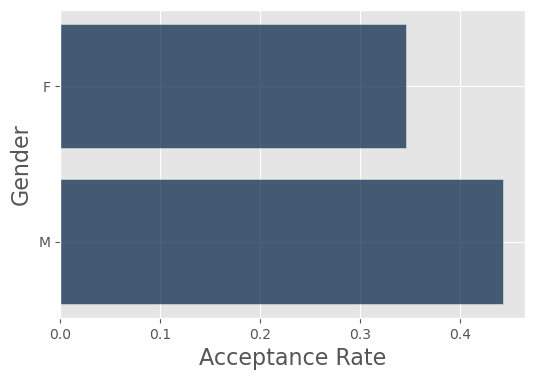

In [63]:
admission_f_m.barh("Gender", "Acceptance Rate") # SOLUTION

### Question 2.5
Which of the following most accurately describes the takeaway from the visualization created by `admission_f_m` above? You should answer the question by assigning `q2_5` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3)`).

1. Female applicants have higher chance of being accepted.
2. Male applicants have higher chance of being accepted.
3. Female and male applicants have the same amount chance of being accepted.

In [ ]:
q2_5 = make_array(2) # SOLUTION

We see by simply utilizing `"Gender"` and `"Admission"` to calculate overall acceptance rates for graduate admissions, the male acceptance rate seems to be higher than the female acceptance rate. However, besides `"Gender"` and `"Admission"`, there was a third column in this table: `"Major"`. Let's investigate how the major will take into play with admission rate between these two recorded gender. (How "grouping" by major as described in Simpson's Paradox will affect the applicants' acceptance rate by gender).

Below, we create two different tables using more complex functionalities of `.group()` and `.pivot()`. Take a look at the information we have gained using the `"Major"` feature below:

In [47]:
admission_major = cal_data.pivot('Gender', 'Major', collect = lambda x: sum(x == 'Accepted') / len(x), values = 'Admission')
admission_major = admission_major.relabeled(['F', 'M'], ['F Acceptance Rate', 'M Acceptance Rate'])
admission_major

Major,F Acceptance Rate,M Acceptance Rate
A,0.824074,0.724956
B,0.68,0.630357
C,0.338954,0.369231
D,0.349333,0.330935
E,0.239186,0.277487
F,0.0733138,0.0589812
Other,0.376911,0.409526


In [48]:
num_applicants = cal_data.group(['Major', 'Gender']).pivot('Gender', 'Major', collect = np.sum, values = 'count')
num_applicants = num_applicants.relabeled(['F', 'M'], ['F Application Count', 'M Application Count'])
num_applicants

Major,F Application Count,M Application Count
A,108,1138
B,25,560
C,593,325
D,375,417
E,393,191
F,341,373
Other,2486,5438


#### BREAK FOR FIGURE 1 TEST
This is test code to see if we could create Figure 1 from [this paper](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf) using the data we had access to.

In [77]:
percent_admit_test = cal_data.pivot('Admission', 'Major')
percent_admit_array = percent_admit_test.column('Accepted') / (percent_admit_test.column('Accepted') + percent_admit_test.column('Rejected'))
percent_admit_test = percent_admit_test.with_column('Percent Admitted', percent_admit_array)
percent_admit_test

Major,Accepted,Rejected,Percent Admitted
A,914,332,0.733547
B,370,215,0.632479
C,321,597,0.349673
D,269,523,0.339646
E,147,437,0.251712
F,47,667,0.0658263
Other,3164,4760,0.399293


In [67]:
percent_female_array = num_applicants.column('F Application Count') / (num_applicants.column('F Application Count') + num_applicants.column('M Application Count'))
num_applicants_test = num_applicants.with_column('Percent Female Applicants', percent_female_array)
num_applicants_test

Major,F Application Count,M Application Count,Percent Female Applicants
A,108,1138,0.0866774
B,25,560,0.042735
C,593,325,0.645969
D,375,417,0.473485
E,393,191,0.672945
F,341,373,0.477591
Other,2486,5438,0.31373


In [80]:
fig1_test = percent_admit_test.join('Major', num_applicants_test)
fig1_test = fig1_test.with_column('Number Applicants', fig1_test.column('Accepted') + fig1_test.column('Rejected'))
fig1_test

Major,Accepted,Rejected,Percent Admitted,F Application Count,M Application Count,Percent Female Applicants,Number Applicants
A,914,332,0.733547,108,1138,0.0866774,1246
B,370,215,0.632479,25,560,0.042735,585
C,321,597,0.349673,593,325,0.645969,918
D,269,523,0.339646,375,417,0.473485,792
E,147,437,0.251712,393,191,0.672945,584
F,47,667,0.0658263,341,373,0.477591,714
Other,3164,4760,0.399293,2486,5438,0.31373,7924


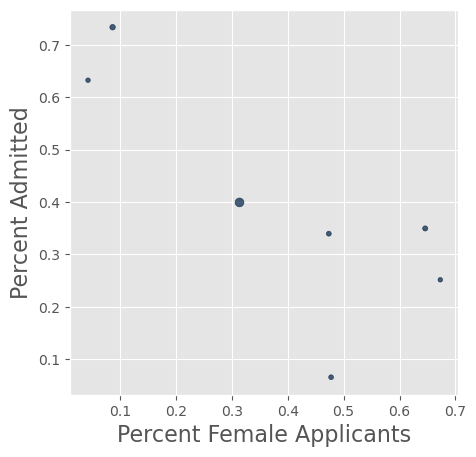

In [81]:
fig1_test.scatter('Percent Female Applicants', 'Percent Admitted', sizes = 'Number Applicants')

#### BREAK DONE

### Question 2.6
Using `admission_major` and `num_counts`, create two separate overlaid bar charts. The first one will plot the number of applicants of males and females across the six majors, and the second will plot their acceptance rates in the majors.

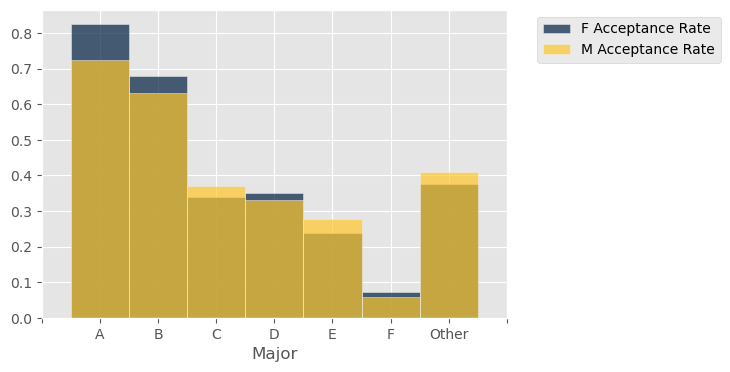

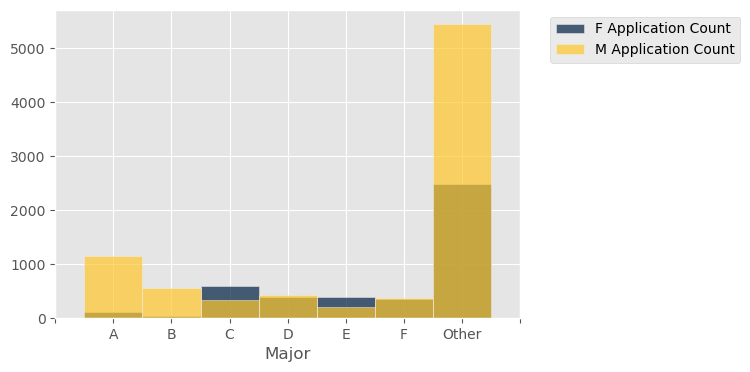

In [65]:
#admission_major = Table.read_table(path + 'admission_major.csv')
#num_applicants = Table.read_table(path + 'num_applicants.csv')

admission_major.bar('Major', overlay = True) # SOLUTION
num_applicants.bar('Major') # SOLUTION

### Question 2.7
Which of the following multiple choice correcrly describes *the visualization created above* with `admission_major` and `num_applicants`? You should answer the question by assigning `q2_7` to `make_array(...)` where `...` is the choice of your answer (eg. `make_array(3, 4)`). Your choice can be can multiple.

1. Among the 6 different majors (not including `"Other"`, female applicants have a slightly higher chance of being accepted than male applicants in several majors
2. Among the 6 different majors (not including `"Other"`), male applicants have a slightly higher chance of being accepted than female applicants in several majors.
3. Overall, female applicants has higher chance of getting in to UC Berkeley.
4. Overall, male applicants has higher chance of getting in to UC Berkeley. 
5. There seems to be **higher female applicants** to the major when there are **lower female acceptance rate** compared to male acceptance rate.  
6. With the visualizatoin above, we can claim there is structrual inequity against female women applicants. 

In [ ]:
q2_7 = make_array(1, 5) # SOLUTION

---
### Thinking about Implications 🤔

### Question 2.8 (Discussion)
Consider the takeaways that you had after looking at the different visualizations you created in **Questions 2.4 and 2.6**. Based on what we've discussed regarding the various sociological paradigms, how do you think these conclusions best align with the paradigms?

*Hint:* The conclusions might not line up perfectly with any one of the paradigms! Just feel free to reflect on which ones they might line up best or worst with. 

**SOLUTION:** The takeaway from the visualization in Question 2.4 likely best aligns with the conflict paradigm, as the consideration of calculating the aggregated average of males vs. females is primarily meant to explore the difference between the more "powerful" vs. less "powerful" gender groups in higher education. The takeaway from the visualization in Question 2.6 has aspects of the rational choice and symbolic interactionism paradigms, as it looks into which majors the different gender groups are choosing to apply to and how these decisions might be the best for them. It also breaks down the aggregated admission rates to look at the individuals at a lower, less aggregated level, in order to explore how the acceptance rates are varying by major.

### Question 2.9 (Discussion) 
A media company wants to make a report on UC Berkeley admissions. What would happen if they ONLY report with the visualization you created in **`Question 2.4`**? How would this report potentially impact the society we see today?

**SOLUTION:** Answer may vary. If we only report the first visualization we created, we will be creating a false narrative to an extent about systemic bias against female applicants. This can discourage some male applicants leading to further drastic acceptance rate. Or change the school policy / logistics if more audience pressures the school to take action based on the wrong analysis. Thus, whether it is leaving out certain visualizations or not recognizing certain phenomenon, data analysis can be malpracticed.

### Question 2.10 (Final Reflection)

**SOLUTION:** Answer will vary. Student's response should indicate some understanding of ways in which the wrong conclusion can be drawn when not enough care is taken for proper data exploration and visualization. Student can also reflect on societal impacts of these incorrect conclusions being drawn.

---
## Done! 😇

That's it! There's nowhere for you to submit this, as labs are not assignments. However, please ask any questions you have with this notebook in lab or on Ed.

There are no extra problems this week, good luck with the homework!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()